# PCA and exam scores

The goal of this notebook is to show how the Principal Component Analysis (PCA) can be applied to a dataset with exam scores. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

We will be working with a file `exam_scores.csv` that contains scores obtained by students during two midterm exams in a college course. Each exam was graded on the 0-100 points scale.

In [2]:
scores = pd.read_csv("http://mth461.ubmath.info/assets/notebooks/exam_scores.csv")
scores

,ex1,ex2
0,72,93
1,58,78
2,55,92
3,42,31
4,90,91
...,...,...
143,89,97
144,71,82
145,73,60
146,88,95


As a preparation, we convert the data into a matrix with two columns, one for each exam. We also compute the mean of each column:

In [3]:
scores_matrix = scores.values

# print the first few rows of the matrix
print(scores_matrix[:10])

#compute and print means
means = scores_matrix.mean(axis=0)
print(f"\n\nmeans:\n{means}")

[[72 93]
 [58 78]
 [55 92]
 [42 31]
 [90 91]
 [55 84]
 [58 91]
 [50 77]
 [22 27]
 [65 61]]


means:
[62.86486486 66.98648649]


The mean of the first exam was about 63 points, and it was about 67 points for the second exam. 

Next, we demean the exams data:

In [4]:
demeaned = scores_matrix  - means

Here are the first few rows of the demeaned matrix: 

In [5]:
with np.printoptions(precision=2):
    print(demeaned[:10])

[[  9.14  26.01]
 [ -4.86  11.01]
 [ -7.86  25.01]
 [-20.86 -35.99]
 [ 27.14  24.01]
 [ -7.86  17.01]
 [ -4.86  24.01]
 [-12.86  10.01]
 [-40.86 -39.99]
 [  2.14  -5.99]]


Next, we compute the covariance matrix of the exams data: 

In [6]:
N = demeaned.shape[0]

CA =  (1/N) * demeaned.T @ demeaned 

with np.printoptions(precision=2):
    print(CA)

[[411.47 270.3 ]
 [270.3  524.99]]


The scores from the two exams is positive, 270.3 which indicates that students who had higher scores on one of the exams also tended to score higher on the other exam. We can verify it by looking at the plot of the data. Each point of this plot represents one student, and the coordinates of the point give the demeaned scores on the two exams: 

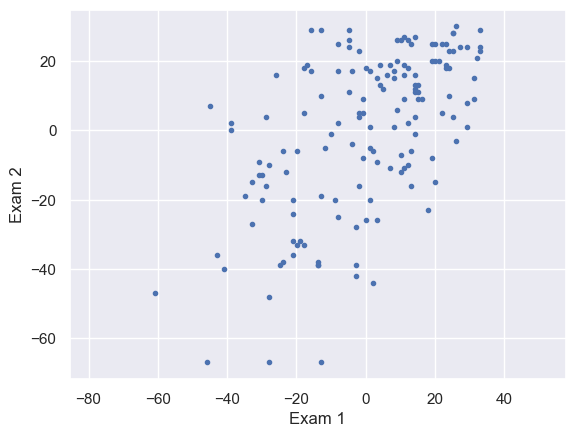

In [7]:
ax = plt.subplot(111)
ax.axis("equal")
ax.plot(demeaned[:, 0], demeaned[:, 1], 'b.')
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2");

The sum of entries on the diagonal of the covariance matrix gives the total variance of the exams data: 

In [8]:
tot_variance = np.diag(CA).sum()
print(tot_variance)

936.4545288531774


Next, we compute eigenvalues and eigenvectors of the covariance matrix. We also order the eigenvalues from the largest to the smallest and we put the eigenvectors in the same order: 

In [9]:
vals, vects = np.linalg.eig(CA)
order = np.argsort(vals)[::-1]
vals = vals[order]
vects = vects[:, order]

Eigenvalues:

In [10]:
print(vals)

[744.42444575 192.03008311]


A matrix with eigenvectors as columns:

In [11]:
print(vects)

[[-0.63027697 -0.77637036]
 [-0.77637036  0.63027697]]


The first eigenvector, corresponding to the largest eigenvalue, is the first principal axis of the exams data. The second eigenvector is the second principal axis.

By dividing the largest eigenvalue by the total variance of the data, we get the fraction of the variance which is captured by the first principal component of the data: 

In [12]:
vals[0]/tot_variance

0.79493923389622

Below we plot the exams data: each point corresponds to demeaned exam scores for a single student. The red line 
gives the direction of the first principal axis, and the green line direction of the second principal axis.

Text(0, 0.5, 'Exam 2')

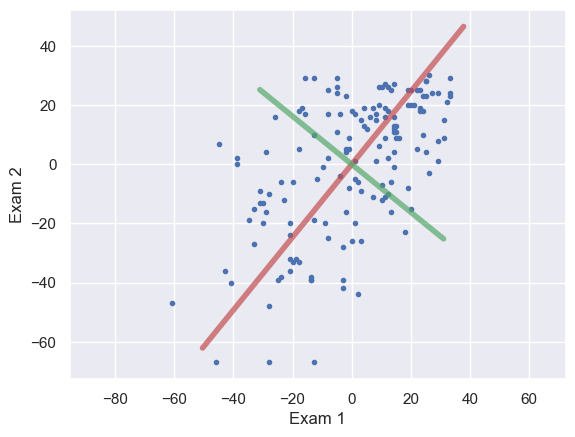

In [13]:
ax = plt.subplot(111)
ax.axis("equal")
ax.plot(demeaned[:, 0], demeaned[:, 1], 'b.')
x = np.array([[80], [-60]])
pca1 = vects[:, 0]*x
x = np.array([[40], [-40]])
pca2 = vects[:, 1]*x

ax.plot(pca1[:, 0], pca1[:, 1], 'r-', lw=4, alpha=0.7)
ax.plot(pca2[:, 0], pca2[:, 1], 'g-', lw=4, alpha=0.7)
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")